In [1]:
# import numpy as np
# from tensorflow.keras.models import load_model
# import joblib

# model = load_model("pressure_ID_Fan_inlet_DL(1).h5")

# x = np.array(['18.51997', '60.93208', '946.2000', '226.4158', '945.4032']).astype(float)

# y = -400.0651

# scaler = joblib.load("scaler(1).pkl")

# x_scaled = scaler.transform(x.reshape(1, -1))

# pred = model.predict(x_scaled)

# print("Predicted value:", pred)


In [2]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

model = load_model("pressure_at_combustion_DL(5).h5")

In [3]:
df = pd.read_csv('Batch-1.1.csv')
df1 = pd.read_csv('Batch-1.1.csv')

In [12]:
df = df.iloc[:,1:24]
# df.drop(columns=['Unnamed: 19','Unnamed: 20'],inplace=True)
df.head()

,Oxygen Consumption -Top,Furnace Power,CombustionChamber Pressure,Suction Damper Position feedback,FDC inlet Temprature,FDC Outlet Temp,FDC Outlet Temp - Upperside,DP across FDC,FDC Outlet Pressure,Pressure at Gas Mixter inlet,...,Pressure at BagHouse Inlet,DP Across baghouse - UpperSide,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,Unnamed: 19,Unnamed: 20,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed
0,1887.744,0.0,-11.65726,58.70226,274.2838,135.1,129.7,55.91363,-114.2795,-119.9363,...,-216.1675,14.93200,17.62587,-386.0677,66.30715,42.5,69.8,946.2,228.6638,945.4032
1,2890.050,0.0,-13.97569,92.22367,400.8029,168.8,162.6,103.37820,-122.7214,-119.8785,...,-219.9002,15.85503,18.51997,-400.0651,60.93208,41.2,80.7,946.2,226.4158,945.4032
2,3892.103,0.0,-13.86719,92.22367,466.3701,191.8,186.5,50.24234,-105.4471,-120.2402,...,-215.4080,16.05035,18.84115,-397.2801,60.93605,43.7,86.0,946.2,221.4280,945.4032
3,4897.067,0.0,-13.58145,92.22729,492.1911,190.5,186.6,85.76027,-119.5096,-119.0828,...,-210.4601,16.11979,18.69213,-391.2399,60.93605,43.1,85.6,946.2,221.3578,945.4032
4,5902.126,0.0,-13.96846,92.23814,492.8675,184.3,181.5,67.95067,-119.4010,-117.3611,...,-215.1259,15.93750,18.62558,-390.9505,60.93208,42.2,85.1,946.2,222.6222,945.4032


In [5]:
print(df.isna().sum())
df.dropna(inplace=True)

Process Mode                          0
Oxygen Consumption -Top               0
Furnace Power                         0
CombustionChamber Pressure            0
Suction Damper Position feedback      0
FDC inlet Temprature                  0
FDC Outlet Temp                       0
FDC Outlet Temp - Upperside           0
DP across FDC                         0
FDC Outlet Pressure                   0
Pressure at Gas Mixter inlet          0
Temp at BagHouse Inlet - UpperSide    0
Temp at BagHouse Inlet - LowerSide    0
Pressure at BagHouse Inlet            0
DP Across baghouse - UpperSide        0
DP Across baghouse - LowerSide        0
Pressure ID Fan Inlet                 0
Canopy Damper Position                0
Unnamed: 19                           0
Unnamed: 20                           0
ID Fan1 Speed                         0
ID Fan1 Current                       0
ID Fan2 Speed                         0
dtype: int64


In [6]:
x = df.drop('CombustionChamber Pressure',axis = 1)
y = df['CombustionChamber Pressure']

In [7]:
x = np.array(x)

In [8]:
sc = joblib.load("scaler(5).pkl")
x_scaled = sc.transform(x)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
pred = model.predict(x_scaled)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [10]:
r2_score(y,pred)

0.9459957992441573

In [11]:
df1[diff.flatten() > 2]

NameError: name 'diff' is not defined

In [ ]:
pred = pred.reshape(1,-1)

In [ ]:
diff = pred - (np.array(y)).reshape(1,-1)
pd.DataFrame(diff)

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
0,-0.71889,-0.312435,-0.337354,-0.659093,0.057527,1.24726,-0.075706,0.110918,-0.078969,-0.044739,...,0.260583,-0.163896,0.161983,-0.012548,-0.312394,0.233369,0.623403,0.205571,0.146786,-0.483819


In [ ]:
df1[diff.flatten() > 3]

In [ ]:
print(diff[diff>3].size)
print(diff[diff>3])


3
[3.28258116 6.174556   4.44043603]


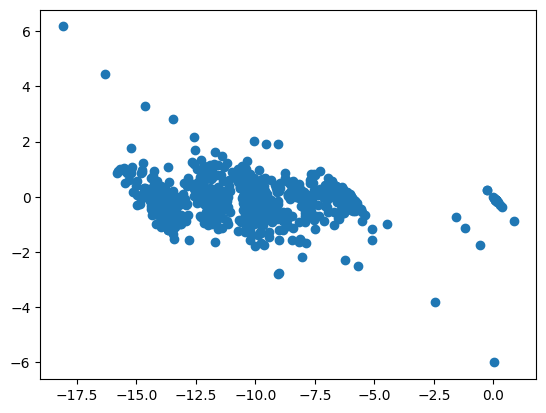

In [ ]:
plt.scatter(y,diff)